# Numpy and Matplotlib Practice with NOAA Weather Data
This IPython Notebook is my end product after taking the Numpy lesson from the Lynda class
<a href='https://www.lynda.com/Numpy-tutorials/Introduction-Data-Analysis-Python/419162-2.html'>Introduction to Data Analysis with Python</a>.

In [476]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
import urllib.request

In [477]:
%matplotlib inline

In [478]:
# urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

In [479]:
open('stations.txt','r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [480]:
# look for stations with GSN. Create dict of those stations with station ID a key.
stations = {}
#fields=[]

#for line in w_data:
for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
        
        stations[fields[0]] = ' '.join(fields[4:])

In [481]:
len(stations)

994

In [482]:
def findstation(s):
    # build dict using comprehention of station codes
    found = {code: name for code,name in stations.items() if s in name}
    print(found)

In [483]:
findstation('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [484]:
findstation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [485]:
findstation('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [486]:
findstation('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


In [487]:
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']

In [488]:
# update data
for station in datastations:
    file_name = station + '.dly'
    # urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/' + file_name, file_name)

In [489]:
open('USW00022536.dly','r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [490]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [491]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols, # the columns to keep
                         dtype = dly_dtype,
                         names = dly_names)

In [492]:
# the lengths of the fields...
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
# the 1,1,1 is for the flags
# i want year, month, element, and all the values i.e. 4, 8, ...
dly_usecols = [1,2,3] + [4 * i for i in range(1,32)]
#types of data are two integers, string of 4 characters, then 31 characters
dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32] * 31
# column names: The names given to the columns. 
# 'obs' means observable. 
dly_names = ['year', 'month', 'obs'] + [str(day) for day in range(1,31 + 1)]

In [493]:
lihue = parsefile('USW00022536.dly')

In [494]:
lihue

array([ (1950, 2, 'TMAX', 256, 256, 256, 267, 217, 228, 256, 272, 256, 256, 256, 244, 256, 256, 244, 244, 250, 256, 239, 250, 256, 256, 267, 261, 267, 267, 261, 261, -9999, -9999, -9999),
       (1950, 2, 'TMIN', 178, 156, 161, 167, 167, 167, 189, 211, 206, 217, 217, 211, 200, 200, 206, 183, 206, 206, 206, 194, 206, 200, 206, 200, 211, 183, 172, 200, -9999, -9999, -9999),
       (1950, 2, 'PRCP', 0, 0, 0, 0, 737, 406, 36, 38, 0, 0, 0, 0, 18, 5, 10, 18, 15, 5, 0, 0, 23, 10, 3, 48, 0, 0, 0, 5, -9999, -9999, -9999),
       ...,
       (2016, 6, 'WSF5', 125, 130, 112, 112, 103, 121, 130, 134, 143, 143, 112, 125, 112, 125, 139, 148, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2016, 6, 'WT01', -9999, 1, 1, 1, -9999, 1, -9999, -9999, 1, 1, 1, 1, -9999, 1, 1, 1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2016, 6, 'WT08', 1, -9999, -9999, -9999, -9999, 1, 

In [495]:
# the temps for each day of the month sit on the same row. Each day should have a separate row
def unroll(record):
    # create a range of dates that corespond to a row
    # specify the beginning of the date with the year and month
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    # create range of dates from above date to the start date plus month using a step of one day 
    dates = np.arange(startdate, startdate + np.timedelta64(1,'M'), np.timedelta64(1,'D'))
    
    # collect the data for those days from the record
    rows = [(date, record[str(i+1)]/10) for i, date in enumerate(dates)]
    # rows output is a list of tuples
    # i is an index to loop over
    # I have no idea what enumerate does
    # divide each record data point by 10 b/c record are in 10ths of degrees.
    
    # convert list of tuples to np array
    # 'value','d' d means double [something] number
    return np.array(rows, dtype=[('date','M8[D]'),('value','d')])

In [496]:
unroll(lihue[0])

array([(datetime.date(1950, 2, 1), 25.6),
       (datetime.date(1950, 2, 2), 25.6),
       (datetime.date(1950, 2, 3), 25.6),
       (datetime.date(1950, 2, 4), 26.7),
       (datetime.date(1950, 2, 5), 21.7),
       (datetime.date(1950, 2, 6), 22.8),
       (datetime.date(1950, 2, 7), 25.6),
       (datetime.date(1950, 2, 8), 27.2),
       (datetime.date(1950, 2, 9), 25.6),
       (datetime.date(1950, 2, 10), 25.6),
       (datetime.date(1950, 2, 11), 25.6),
       (datetime.date(1950, 2, 12), 24.4),
       (datetime.date(1950, 2, 13), 25.6),
       (datetime.date(1950, 2, 14), 25.6),
       (datetime.date(1950, 2, 15), 24.4),
       (datetime.date(1950, 2, 16), 24.4),
       (datetime.date(1950, 2, 17), 25.0),
       (datetime.date(1950, 2, 18), 25.6),
       (datetime.date(1950, 2, 19), 23.9),
       (datetime.date(1950, 2, 20), 25.0),
       (datetime.date(1950, 2, 21), 25.6),
       (datetime.date(1950, 2, 22), 25.6),
       (datetime.date(1950, 2, 23), 26.7),
       (datetime.dat

In [497]:
def getobs(filename,obs):
    # concatonate all the values in a month into a single np array
    # select a single observable e.g., max temp
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [498]:
getobs('USW00022536.dly','TMIN')

array([(datetime.date(1950, 2, 1), 17.8),
       (datetime.date(1950, 2, 2), 15.6),
       (datetime.date(1950, 2, 3), 16.1), ...,
       (datetime.date(2016, 6, 28), -999.9),
       (datetime.date(2016, 6, 29), -999.9),
       (datetime.date(2016, 6, 30), -999.9)], 
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [499]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

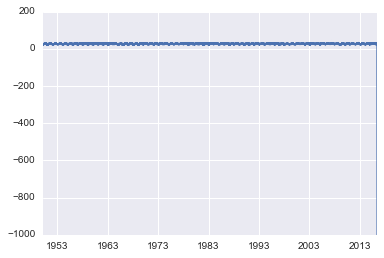

In [500]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])

In [501]:
def getobs(filename,obs):
    # concatonate all the values in a month into a single np array
    # select a single observable e.g., max temp
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    # -999.9 means no value. Change those values to nan using boolian mask
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [502]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

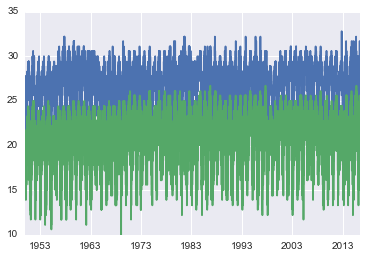

In [503]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

In [504]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(nan, nan)

## Practice interpolation

[0, 8, 0, 12]

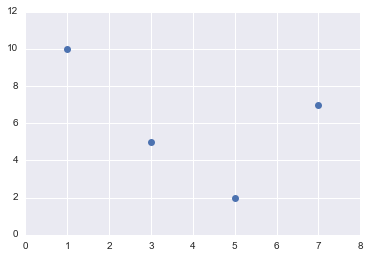

In [505]:
x = np.array([1,3,5,7],'d')
y = np.array([10,5,2,7],'d')

pp.plot(x,y,'o')

pp.axis([0,8,0,12])

In [506]:
np.linspace(1,7,50)

array([ 1.        ,  1.12244898,  1.24489796,  1.36734694,  1.48979592,
        1.6122449 ,  1.73469388,  1.85714286,  1.97959184,  2.10204082,
        2.2244898 ,  2.34693878,  2.46938776,  2.59183673,  2.71428571,
        2.83673469,  2.95918367,  3.08163265,  3.20408163,  3.32653061,
        3.44897959,  3.57142857,  3.69387755,  3.81632653,  3.93877551,
        4.06122449,  4.18367347,  4.30612245,  4.42857143,  4.55102041,
        4.67346939,  4.79591837,  4.91836735,  5.04081633,  5.16326531,
        5.28571429,  5.40816327,  5.53061224,  5.65306122,  5.7755102 ,
        5.89795918,  6.02040816,  6.14285714,  6.26530612,  6.3877551 ,
        6.51020408,  6.63265306,  6.75510204,  6.87755102,  7.        ])

[0, 8, 0, 12]

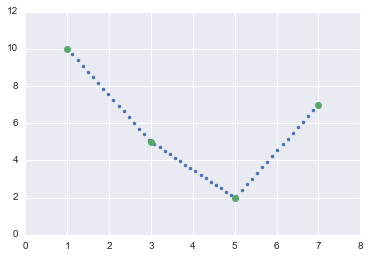

In [507]:
xs = np.linspace(1,7,50)
ys = np.interp(xs,x,y)
# interpolate the points in xs from the existing ones

pp.plot(xs,ys,'.')
pp.plot(x,y,'o')
pp.axis([0,8,0,12])

## Now interpolate missing (nan (not a number)) temperature values

In [508]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])
    # '~' is not. For some reason not doesn't work.

In [509]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)

In [510]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(21.049074493960511, 27.302040648060352)

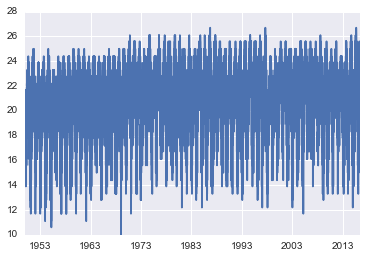

In [511]:
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

In [512]:
def plot_smoothed(t, win = 10):
    # win (window) is the range of the running average
    smoothed = np.correlate(t['value'], np.ones(win)/win, 'same')
    # 'same' means size of the resulting is the same as the origional
    pp.plot(t['date'], smoothed)

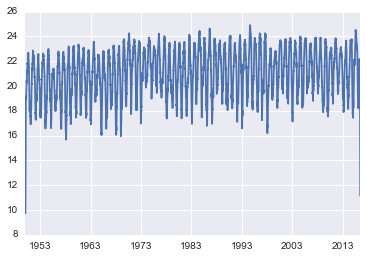

In [513]:
plot_smoothed(lihue_tmin,50)

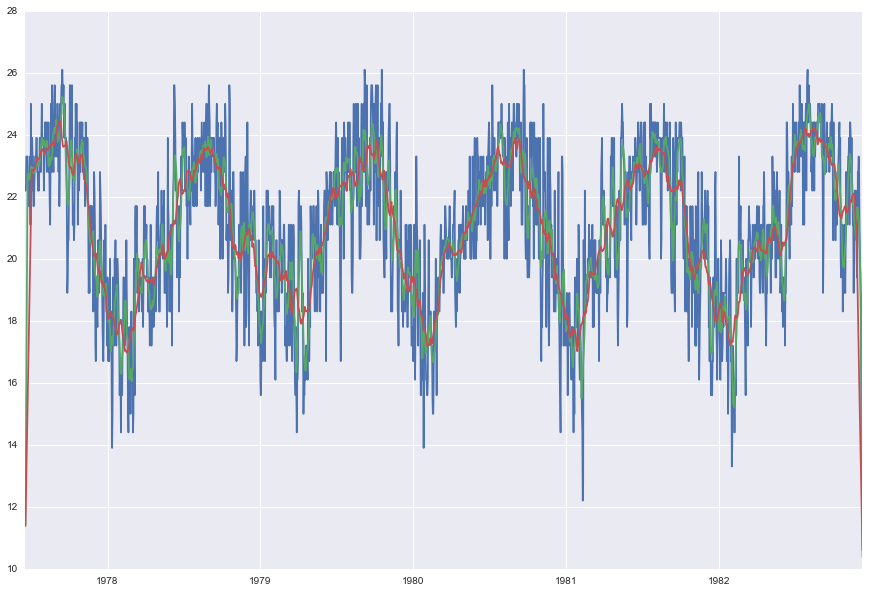

In [514]:
# compare a smaller slice of the data against unsmoothed and different running averages
pp.figure(figsize=(15,10))
pp.plot(lihue_tmin[10000:12000]['date'],lihue_tmin[10000:12000]['value'])

plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000],30)

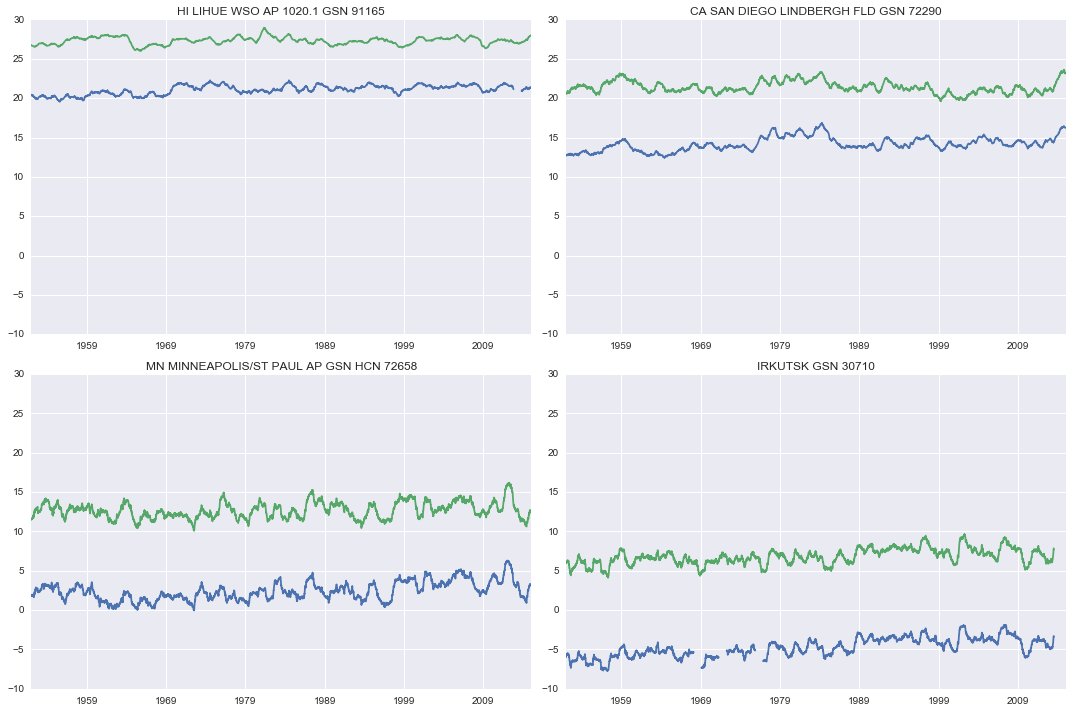

In [515]:
# plot all 4 stations together
pp.figure(figsize=(15,10))

for i,code in enumerate(datastations):
    pp.subplot(2,2,i+1)
    
    plot_smoothed(getobs('{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('{}.dly'.format(code),'TMAX'),365)
    
    pp.title(stations[code])
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2015'),ymin=-10,ymax=30)

pp.tight_layout()

In [516]:
def selectyear(data,year):
    # extract a single year of data
    # use numpy boolian mask indexing
    start_time = np.datetime64('{}'.format(year))
    end_time = start_time + np.timedelta64(1,'Y')
    
    # end ['value'] parameter gives only temperature values from the array
    return data[(data['date'] >= start_time) & (data['date'] < end_time)]['value']

In [538]:
selectyear(lihue_tmin,1951)

array([ 17.8,  17.8,  17.2,  18.3,  20. ,  21.7,  22.2,  21.7,  22.2,
        22.2,  21.7,  21.7,  19.4,  18.9,  18.3,  18.3,  19.4,  20.6,
        16.7,  14.4,  14.4,  17.2,  15. ,  12.8,  14.4,  13.3,  15. ,
        14.4,  17.8,  18.3,  16.7,  16.7,  17.2,  16.7,  17.8,  14.4,
        12.2,  13.3,  13.9,  12.8,  14.4,  14.4,  18.9,  19.4,  20. ,
        18.3,  18.3,  18.9,  20. ,  18.3,  19.4,  13.3,  11.7,  17.8,
        17.2,  17.8,  21.1,  22.2,  20.6,  22.2,  19.4,  20. ,  18.3,
        17.8,  17.8,  17.2,  16.1,  18.9,  18.9,  18.9,  17.8,  16.7,
        15.6,  13.3,  13.9,  15.6,  15.6,  21.7,  20.6,  18.3,  15.6,
        14.4,  17.2,  17.8,  18.9,  20. ,  18.9,  18.3,  18.3,  20.6,
        20. ,  18.9,  18.3,  21.1,  16.7,  21.7,  21.1,  21.7,  17.2,
        16.7,  17.8,  18.3,  16.1,  19.4,  20.6,  18.3,  18.3,  17.2,
        18.9,  21.7,  21.7,  21.7,  21.1,  20.6,  20.6,  20. ,  21.7,
        20. ,  20. ,  19.4,  18.3,  21.7,  22.2,  22.8,  20. ,  19.4,
        17.2,  22.2,

## Computing Daily Record
Reformat temperature data into 2D array.

In [518]:
# arrange all the years in a matrix
lihue_tmin_all = np.vstack([selectyear(lihue_tmin, year)[:365] for year in range(1951, 2015 + 1)])

In [519]:
lihue_tmin_all

array([[ 17.8,  17.8,  17.2, ...,  20.6,  19.4,  18.9],
       [ 17.2,  19.4,  21.7, ...,  21.7,  20.6,  17.8],
       [ 17.8,  18.3,  19.4, ...,  13.3,  15. ,  15. ],
       ..., 
       [ 20. ,  20. ,  19.4, ...,  19.4,  20. ,  18.3],
       [ 17.8,  20. ,  17.8, ...,  18.9,  16.1,  14.4],
       [ 15. ,  15. ,  13.3, ...,  18.9,  19.4,  18.3]])

In [520]:
lihue_tmin_all.shape

(65, 365)

In [521]:
# compute max and min of each row
lihue_tmin_recordmin = np.min(lihue_tmin_all, axis = 0)
lihue_tmin_recordmax = np.max(lihue_tmin_all, axis = 0)

(0.0, 365, 22.0, 27.0)

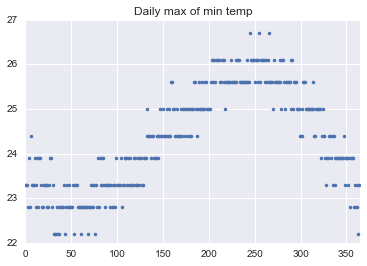

In [522]:
pp.plot(lihue_tmin_recordmax,'.')
pp.title('Daily max of min temp')
pp.axis(xmax = 365)

In [523]:
# now build a stacked graph (a bar showing the min and max temp on a day) and plot a specific year against it
# first get the tmax data
lihue_tmax_all = np.vstack([selectyear(lihue_tmax, year)[:365] for year in range(1951, 2015 + 1)])

(0.0, 365, 18.0, 34.0)

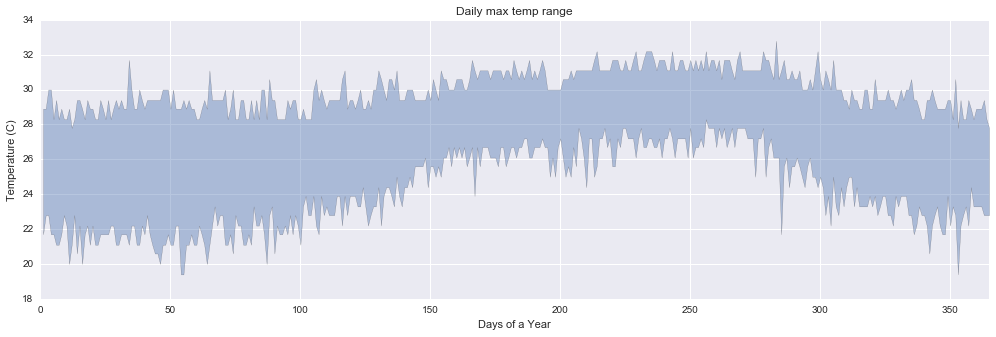

In [524]:
days = np.arange(1,365+1)

lihue_tmax_recordmin = np.min(lihue_tmax_all, axis = 0)
lihue_tmax_recordmax = np.max(lihue_tmax_all, axis = 0)
# to shade an area between two values use pp.fill_between
# alpha value is the transparance value
pp.figure(figsize=(17,5))
pp.fill_between(days,lihue_tmax_recordmin,lihue_tmax_recordmax, alpha=0.4)
pp.title('Daily max temp range')
pp.xlabel('Days of a Year')
pp.ylabel('Temperature (C)')
pp.axis(xmax = 365)

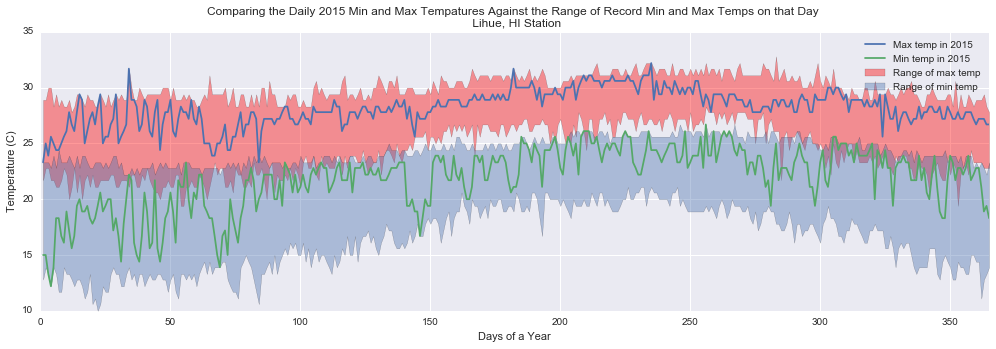

In [525]:
def plot_lihue():
    pp.figure(figsize=(17,5))
    year = 2015
    days = np.arange(1,365+1)
    pp.fill_between(days, lihue_tmax_recordmin,lihue_tmax_recordmax, alpha=0.4, facecolor='red', label='Range of max temp')
    pp.plot(days, selectyear(lihue_tmax,year), label='Max temp in ' + str(year))

    pp.fill_between(days, lihue_tmin_recordmin,lihue_tmin_recordmax, alpha=0.4, label='Range of min temp')
    pp.plot(days, selectyear(lihue_tmin,year), label='Min temp in ' + str(year))


    pp.title('Comparing the Daily ' + str(year) + ' Min and Max Tempatures Against the Range of Record Min and Max Temps on that Day'+ 
            ' \n Lihue, HI Station')
    pp.axis(xmax = 365)
    pp.xlabel('Days of a Year')
    pp.ylabel('Temperature (C)')
    pp.legend()
    pp.savefig('Lihue Daily Tempature Ranges.jpg')
plot_lihue()
# This would be cool as a gif over a range of years.

In [526]:
# is there an Austin station?
def liststations():
    name_list = []
    name_list = [name[1] for name in stations.items()]
    name_list.sort()
    return name_list

In [527]:
# liststations()

no Austin station :(

## Challenge  
Find year with highest TMin in Minneapolis  
Find year with lowest TMin in San Diego  
In the same plot, show Tmin and Tmax throughout those years for those cities.

In [528]:
minneap_tmax = getobs('USW00014922.dly', 'TMAX')
minneap_tmin = getobs('USW00014922.dly', 'TMIN')

sandiego_tmax = getobs('USW00023188.dly', 'TMAX')
sandiego_tmin = getobs('USW00023188.dly', 'TMIN')

In [529]:
fillnans(minneap_tmax)
fillnans(minneap_tmin)
fillnans(sandiego_tmax)
fillnans(sandiego_tmin)

In [530]:
# assemble array of all years and compute mean in each row
years = np.arange(1940, 2014 + 1)
minneap_tmax_all = np.vstack([selectyear(minneap_tmax, year)[:365] for year in years])

In [531]:
minneap_mean = np.mean(minneap_tmax_all, axis=1)
# axis=1 means only across rows, not mean of all years

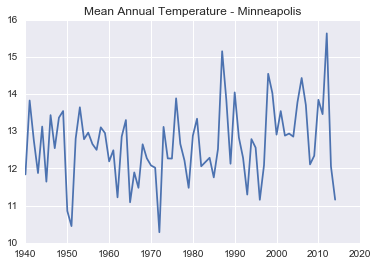

In [532]:
pp.plot(years, minneap_mean)
pp.title('Mean Annual Temperature - Minneapolis')

In [533]:
# Find warmest year in Minn
# use np.argmax() to return the index no. of the maximum value in an array
minneap_warmest_yr = years[np.argmax(minneap_mean)]
minneap_warmest_yr

2012

In [534]:
# Find coldest year in Minn
sandiego_tmin_all = np.vstack([selectyear(sandiego_tmin, year)[:365] for year in years])
sandiego_mean = np.mean(sandiego_tmin_all, axis=1)
sandeigo_coldest_yr = years[np.argmin(sandiego_mean)]
sandeigo_coldest_yr

1948

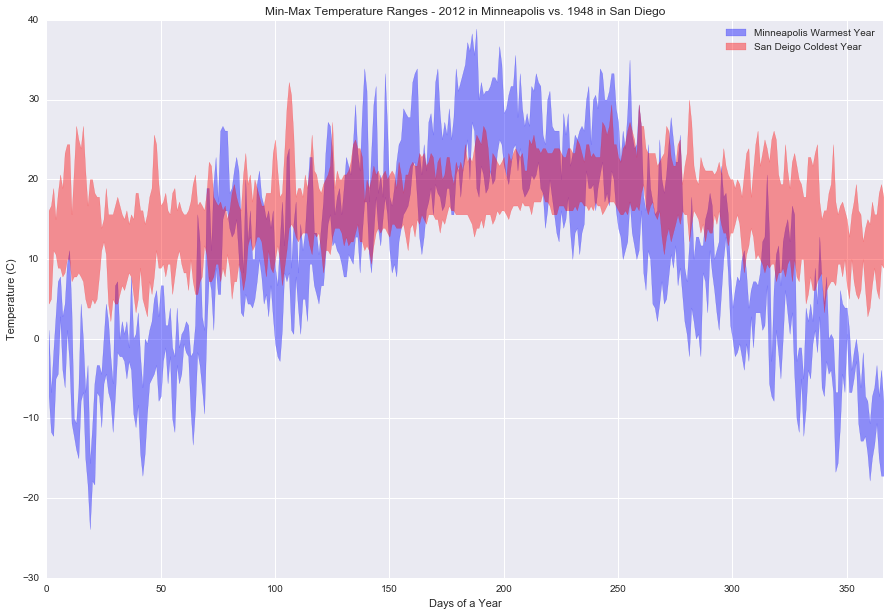

In [537]:
# leap years...
days = np.arange(1,366+1)
pp.figure(figsize=(15,10))
pp.fill_between(days,
                selectyear(minneap_tmax, minneap_warmest_yr),
                selectyear(minneap_tmin, minneap_warmest_yr),
               color = 'b', alpha = 0.4, label='Minneapolis Warmest Year')

pp.fill_between(days,
                selectyear(sandiego_tmax, sandeigo_coldest_yr),
                selectyear(sandiego_tmin, sandeigo_coldest_yr),
               color = 'r', alpha = 0.4, label='San Deigo Coldest Year')

pp.axis(xmax = 366)
pp.xlabel('Days of a Year')
pp.ylabel('Temperature (C)')
pp.legend()
pp.title('Min-Max Temperature Ranges - {} in Minneapolis vs. {} in San Diego'.format(minneap_warmest_yr,sandeigo_coldest_yr))